**Employee Performance and Retention Analysis**

Employee attrition and poor performance are critical challenges for organizations, impacting costs, productivity, and team dynamics. High attrition rates lead to increased recruitment and training expenses, while insufficient performance can hinder an organization’s growth and competitiveness. Addressing these challenges requires understanding the drivers behind both attrition and performance.

In [ ]:
# prompt: I need a code to download this pavansubhasht/ibm-hr-analytics-attrition-dataset from Kaggle

# Install the Kaggle API client.
!pip install kaggle

# Download the dataset.
!kaggle datasets download -d pavansubhasht/ibm-hr-analytics-attrition-dataset

# Unzip the dataset (if it's a zip file).
!unzip ibm-hr-analytics-attrition-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
License(s): DbCL-1.0
  0% 0.00/50.1k [00:00<?, ?B/s]
100% 50.1k/50.1k [00:00<00:00, 45.0MB/s]
Archive:  ibm-hr-analytics-attrition-dataset.zip
  inflating: WA_Fn-UseC_-HR-Employee-Attrition.csv  


In [ ]:
# prompt: load the data set

import pandas as pd

# Load the dataset into a Pandas DataFrame.
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Print the first few rows of the DataFrame to verify that it loaded correctly.
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# prompt: Generate a code to drop EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours from the dataset already loaded

columns_to_drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
newdata = data.drop(columns=columns_to_drop)

# Print the first few rows to verify
newdata.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
print(newdata.shape)

(1470, 31)


In [ ]:
# prompt: I need a code to duplicate "newdate" and save as newdata2

newdata2 = newdata.copy() #-------------- newdata2 to be used later

In [ ]:
# prompt: generate a code to check for missing values in newdata

# Check for missing values
print(newdata.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


In [ ]:
# prompt: Create a code that converts numerical ratings into descriptive categories

# Define the mappings for each column
education_mapping = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
environment_satisfaction_mapping = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
job_involvement_mapping = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
job_satisfaction_mapping = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
performance_rating_mapping = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
relationship_satisfaction_mapping = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
work_life_balance_mapping = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}

# Apply the mappings to the respective columns
newdata['Education'] = newdata['Education'].replace(education_mapping)
newdata['EnvironmentSatisfaction'] = newdata['EnvironmentSatisfaction'].replace(environment_satisfaction_mapping)
newdata['JobInvolvement'] = newdata['JobInvolvement'].replace(job_involvement_mapping)
newdata['JobSatisfaction'] = newdata['JobSatisfaction'].replace(job_satisfaction_mapping)
newdata['PerformanceRating'] = newdata['PerformanceRating'].replace(performance_rating_mapping)
newdata['RelationshipSatisfaction'] = newdata['RelationshipSatisfaction'].replace(relationship_satisfaction_mapping)
newdata['WorkLifeBalance'] = newdata['WorkLifeBalance'].replace(work_life_balance_mapping)

# Check the updated dataset
newdata.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


In [ ]:
# prompt: convert respective columns to categorical data

# Convert columns to categorical
newdata['Attrition'] = newdata['Attrition'].astype('category')
newdata['JobSatisfaction'] = newdata['JobSatisfaction'].astype('category')
newdata['WorkLifeBalance'] = newdata['WorkLifeBalance'].astype('category')
newdata['EnvironmentSatisfaction'] = newdata['EnvironmentSatisfaction'].astype('category')
newdata['PerformanceRating'] = newdata['PerformanceRating'].astype('category')
newdata['Gender'] = newdata['Gender'].astype('category')

# Check the updated dataset
newdata.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


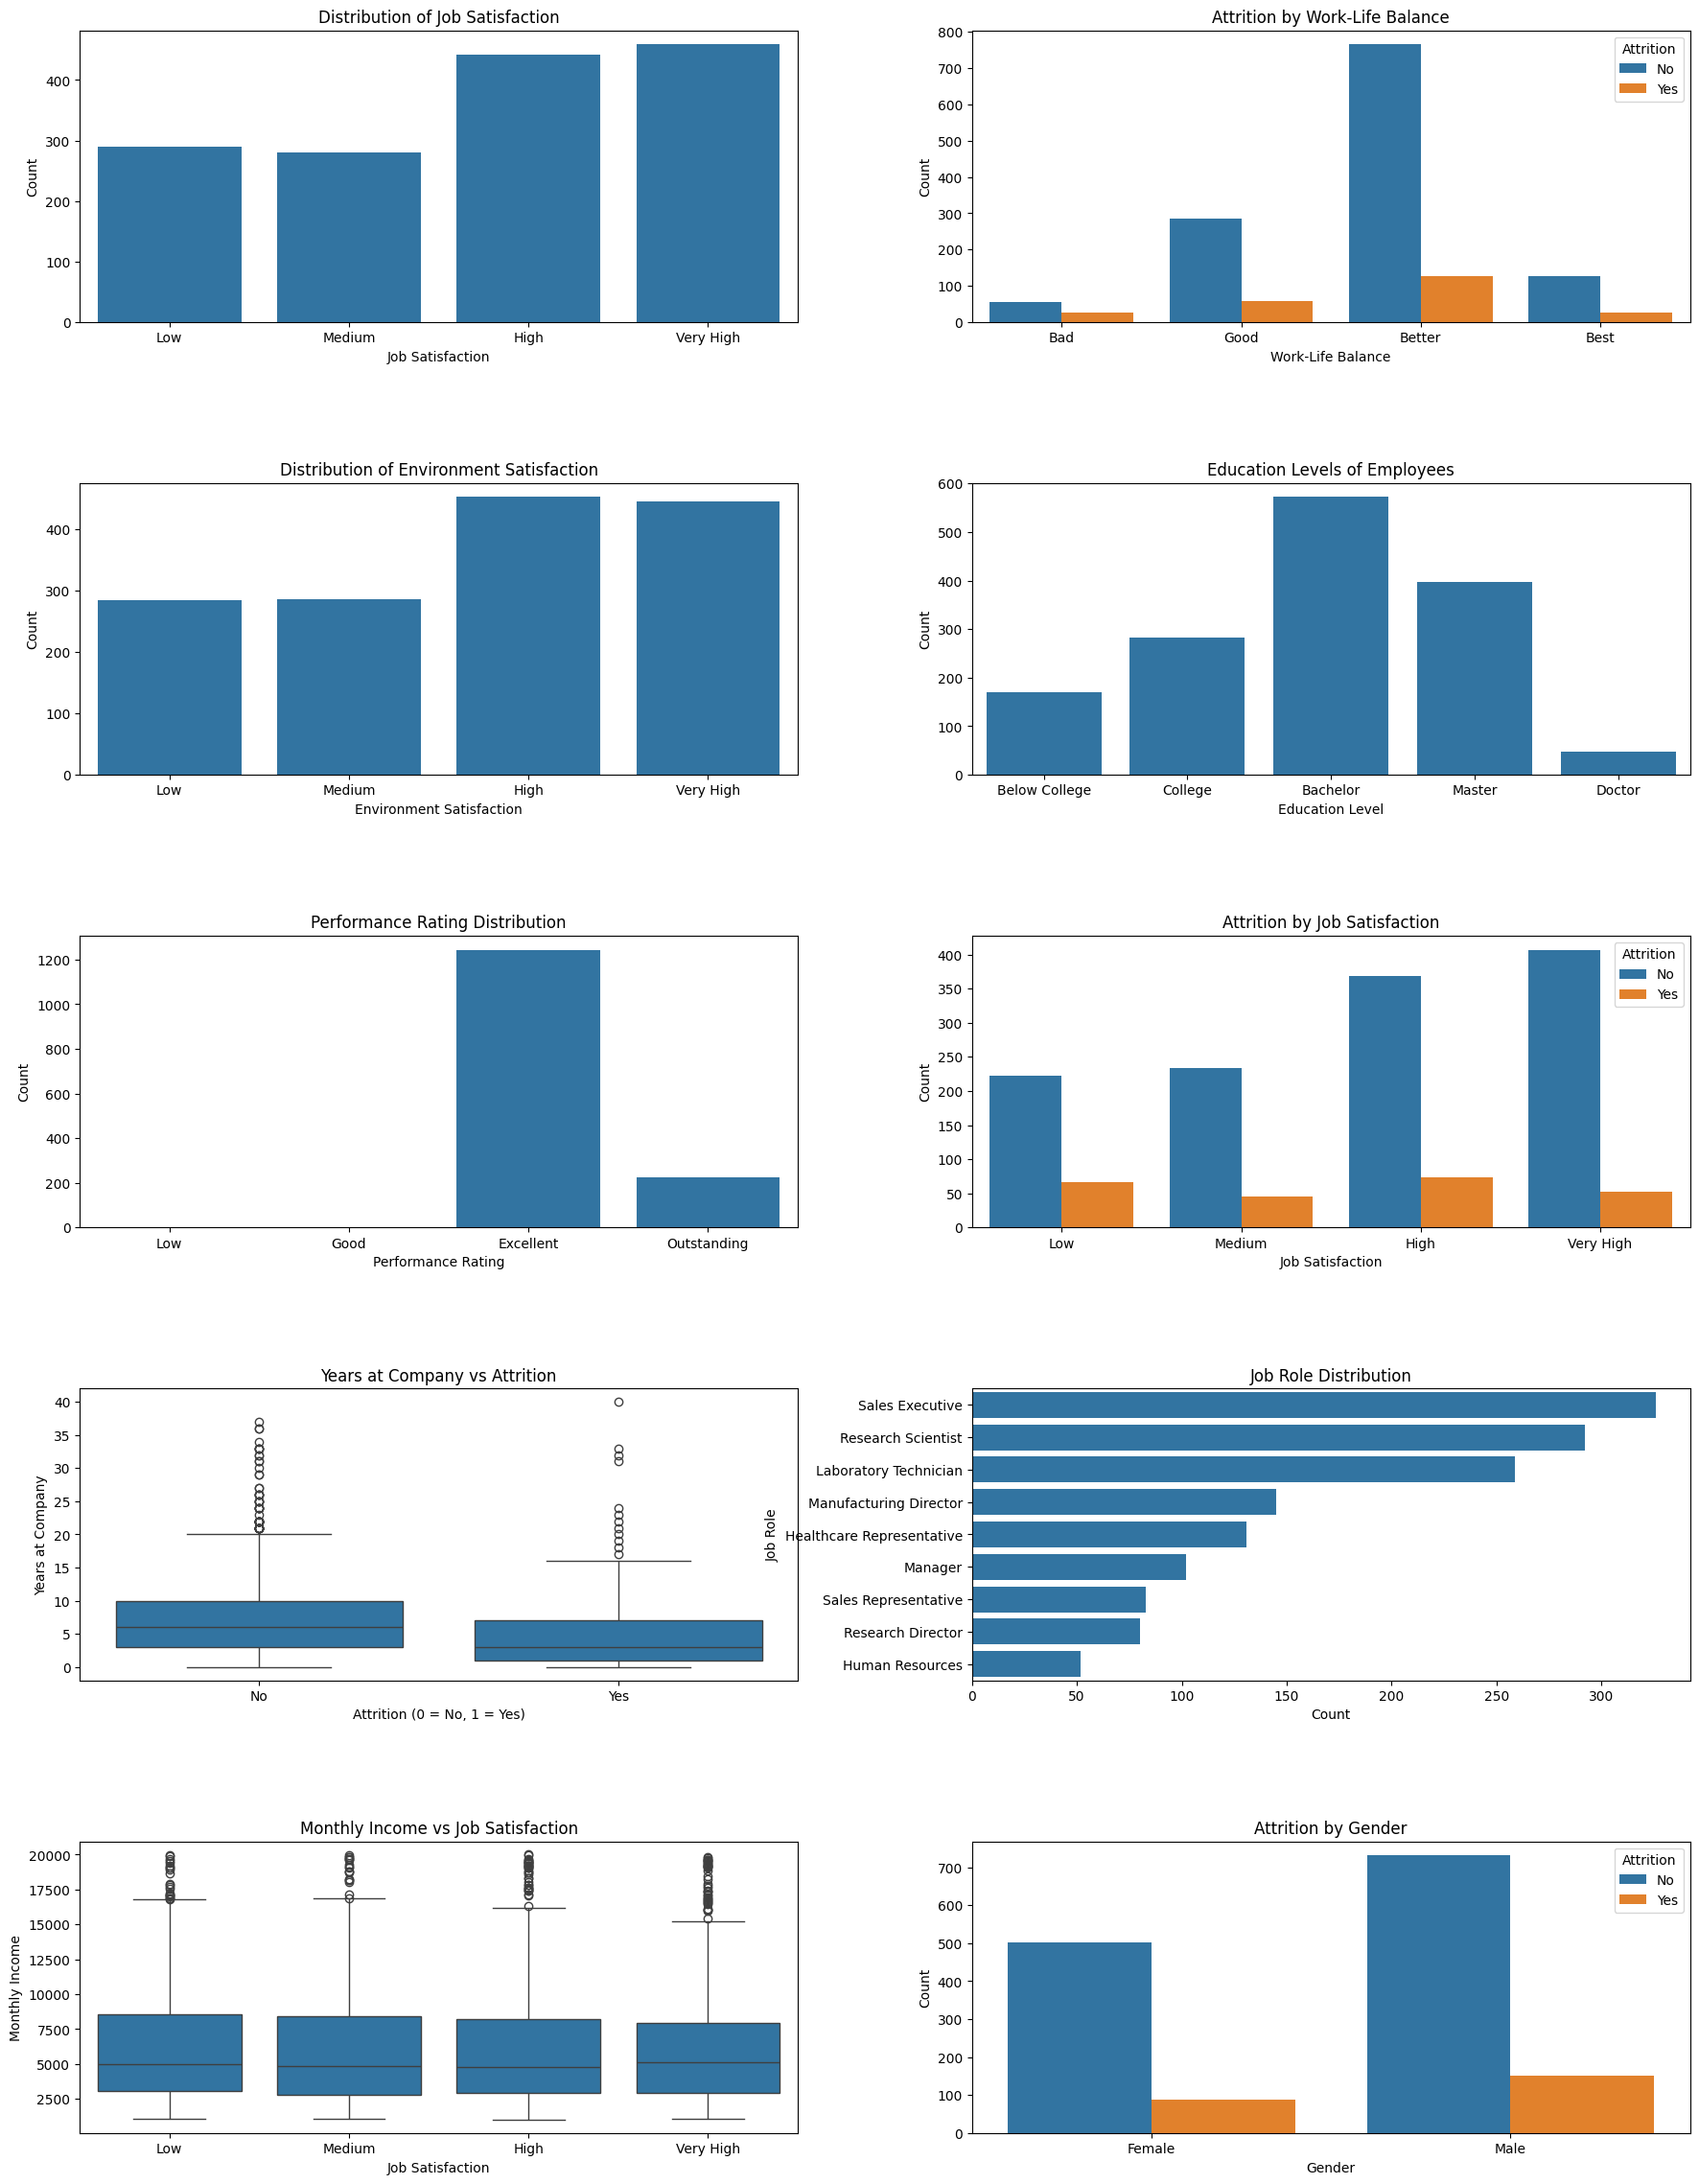

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and subplots
fig, axes = plt.subplots(5, 2, figsize=(20, 25))  # 5 rows, 2 columns
fig.tight_layout(pad=10.0)  # Adjust spacing between plots

# Visualization 1: Distribution of Job Satisfaction
sns.countplot(x='JobSatisfaction', data=newdata, order=['Low', 'Medium', 'High', 'Very High'], ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Job Satisfaction')
axes[0, 0].set_xlabel('Job Satisfaction')
axes[0, 0].set_ylabel('Count')

# Visualization 2: Work-Life Balance vs Attrition
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=newdata, order=['Bad', 'Good', 'Better', 'Best'], ax=axes[0, 1])
axes[0, 1].set_title('Attrition by Work-Life Balance')
axes[0, 1].set_xlabel('Work-Life Balance')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title='Attrition', labels=['No', 'Yes'])

# Visualization 3: Distribution of Environment Satisfaction
sns.countplot(x='EnvironmentSatisfaction', data=newdata, order=['Low', 'Medium', 'High', 'Very High'], ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Environment Satisfaction')
axes[1, 0].set_xlabel('Environment Satisfaction')
axes[1, 0].set_ylabel('Count')

# Visualization 4: Education Levels of Employees
sns.countplot(x='Education', data=newdata, order=['Below College', 'College', 'Bachelor', 'Master', 'Doctor'], ax=axes[1, 1])
axes[1, 1].set_title('Education Levels of Employees')
axes[1, 1].set_xlabel('Education Level')
axes[1, 1].set_ylabel('Count')

# Visualization 5: Performance Rating Distribution
sns.countplot(x='PerformanceRating', data=newdata, order=['Low', 'Good', 'Excellent', 'Outstanding'], ax=axes[2, 0])
axes[2, 0].set_title('Performance Rating Distribution')
axes[2, 0].set_xlabel('Performance Rating')
axes[2, 0].set_ylabel('Count')

# Visualization 6: Relationship Between Job Satisfaction and Attrition
sns.countplot(x='JobSatisfaction', hue='Attrition', data=newdata, order=['Low', 'Medium', 'High', 'Very High'], ax=axes[2, 1])
axes[2, 1].set_title('Attrition by Job Satisfaction')
axes[2, 1].set_xlabel('Job Satisfaction')
axes[2, 1].set_ylabel('Count')
axes[2, 1].legend(title='Attrition', labels=['No', 'Yes'])

# Visualization 7: Years at Company vs Attrition
sns.boxplot(x='Attrition', y='YearsAtCompany', data=newdata, ax=axes[3, 0])
axes[3, 0].set_title('Years at Company vs Attrition')
axes[3, 0].set_xlabel('Attrition (0 = No, 1 = Yes)')
axes[3, 0].set_ylabel('Years at Company')

# Visualization 8: Job Role Distribution
sns.countplot(y='JobRole', data=newdata, order=newdata['JobRole'].value_counts().index, ax=axes[3, 1])
axes[3, 1].set_title('Job Role Distribution')
axes[3, 1].set_xlabel('Count')
axes[3, 1].set_ylabel('Job Role')

# Visualization 9: Monthly Income vs Job Satisfaction
sns.boxplot(x='JobSatisfaction', y='MonthlyIncome', data=newdata, order=['Low', 'Medium', 'High', 'Very High'], ax=axes[4, 0])
axes[4, 0].set_title('Monthly Income vs Job Satisfaction')
axes[4, 0].set_xlabel('Job Satisfaction')
axes[4, 0].set_ylabel('Monthly Income')

# Visualization 10: Attrition by Gender
sns.countplot(x='Gender', hue='Attrition', data=newdata, ax=axes[4, 1])
axes[4, 1].set_title('Attrition by Gender')
axes[4, 1].set_xlabel('Gender')
axes[4, 1].set_ylabel('Count')
axes[4, 1].legend(title='Attrition', labels=['No', 'Yes'])

# Show the plots
plt.show()
newdata.head()

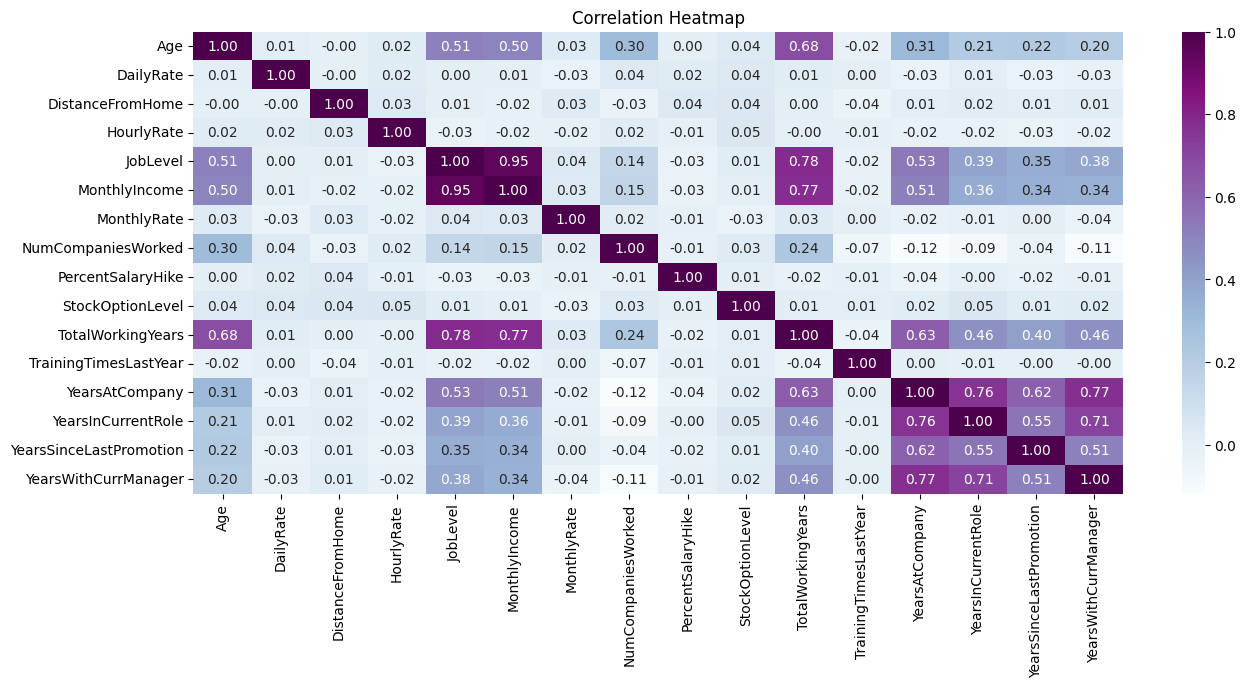

In [ ]:
# prompt: I need a correlation heat map for my newdata
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only numeric columns
corr_data = newdata.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(corr_data.corr(), cmap='BuPu', annot=True, fmt='.2f')

# Add titles
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# prompt: Code to describe the newdata dataset and check for mean, std dev etc

# Display descriptive statistics for numerical columns
newdata.describe()


,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,2.063946,6502.931293,14313.103401,2.693197,15.209524,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.329428,1.106940,4707.956783,7117.786044,2.498009,3.659938,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,1.000000,2911.000000,8047.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,2.000000,4919.000000,14235.500000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,3.000000,8379.000000,20461.500000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,5.000000,19999.000000,26999.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


**REGRESSION ANALYSIS**

In [ ]:
# prompt: Convert the Gender and Attrition columns to numerical values using label encoder (No - 0, Yes - 1)

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Gender' column
newdata['Gender'] = label_encoder.fit_transform(newdata['Gender'])

# Fit and transform the 'Attrition' column
newdata['Attrition'] = label_encoder.fit_transform(newdata['Attrition'])

# Display the first few rows to verify the changes
newdata.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,0,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,1,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,1,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,0,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,1,...,Excellent,Very High,1,6,3,Better,2,2,2,2


In [ ]:
# prompt: i need a code to encode categorical data in the new dataset except PerformanceRating as it would be the Y axis in the regression analysis

# Iterate through all columns except 'PerformanceRating'
# Encode categorical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
def transform(dataframe):
    # scale the numerical columns
    removeY = dataframe.drop(['PerformanceRating'], axis = 1)
    for i in removeY.columns:
        if i in dataframe.select_dtypes(include = 'number').columns:
            dataframe[[i]] = scaler.fit_transform(dataframe[[i]])
    # label encode the categorical columns
    for i in dataframe.columns:
        if i in dataframe.select_dtypes(include = ['object', 'category']).columns:
            dataframe[i] = label_encoder.fit_transform(dataframe[i])
    return dataframe

transform(newdata)

# Display the first few rows to verify the changes
newdata.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,2.280906,2,0.742527,2,-1.010909,2,1,2,-1.224745,...,0,1,-0.932014,-0.421642,-2.171982,0,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-0.438422,1,-1.297775,1,-0.147150,1,1,0,0.816497,...,1,3,0.241988,-0.164511,0.155707,2,0.488508,0.764998,-0.368715,0.806541
2,0.008343,2.280906,2,1.414363,1,-0.887515,2,4,3,0.816497,...,0,2,-0.932014,-0.550208,0.155707,2,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,-0.438422,1,1.461466,1,-0.764121,4,1,3,-1.224745,...,0,0,-0.932014,-0.421642,0.155707,2,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.438422,2,-0.524295,1,-0.887515,1,3,1,0.816497,...,0,3,0.241988,-0.678774,0.155707,2,-0.817734,-0.615492,-0.058285,-0.595227


In [ ]:
# prompt: Split the data into training and testing sets, define the independent and dependent variables, and  identify the top features based on their importance for predicting performance ratings

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_data, test_data = train_test_split(newdata, test_size=0.2, random_state=42)

x = train_data.drop('PerformanceRating', axis = 1) # --------------------------------- Define the Independent Variables
y = train_data.PerformanceRating # --------------------------------------------------- Define the dependent Variable

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
best_feature1 = SelectKBest(score_func = f_classif, k = 'all')
fitting1 = best_feature1.fit(x,y)
scores1 = pd.DataFrame(fitting1.scores_)
columns1 = pd.DataFrame(x.columns)
feat_score1 = pd.concat([columns1, scores1], axis = 1)
feat_score1.columns = ['Feature', 'F_classif_score']
k1 = feat_score1.nlargest(11, 'F_classif_score')

k1.sort_values(by = 'F_classif_score', ascending = False)

,Feature,F_classif_score
20,PercentSalaryHike,1707.326226
5,DistanceFromHome,2.930926
14,JobSatisfaction,2.849296
28,YearsSinceLastPromotion,1.140740
27,YearsInCurrentRole,0.673676
25,WorkLifeBalance,0.664726
23,TotalWorkingYears,0.664718
2,BusinessTravel,0.607668
8,EnvironmentSatisfaction,0.481974
4,Department,0.446650


In [ ]:
train_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# prompt: Select key features related to employee performance and satisfaction from the dataset to predict performance ratings effectively

aidm=['PercentSalaryHike', 'DistanceFromHome', 'JobSatisfaction', 'YearsSinceLastPromotion', 'YearsInCurrentRole', 'WorkLifeBalance',
      'TotalWorkingYears', 'EnvironmentSatisfaction', 'RelationshipSatisfaction']

x = train_data[aidm]
y = train_data.PerformanceRating

In [ ]:
# prompt: Split the data into training (80%) and testing (20%) sets

# ----------- Splitting Into Train and Test ---------------
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, stratify = y)
print(f"xtrain size = {xtrain.shape}")
print(f"xtest size = {xtest.shape}")
print(f"ytrain size = {ytrain.shape}")
print(f"ytest size = {ytest.shape}")

xtrain size = (940, 9)
xtest size = (236, 9)
ytrain size = (940,)
ytest size = (236,)


In [ ]:
#  ------------ MODELLING ----------
from sklearn.linear_model import LinearRegression # --------------- Import the algorithm for modelling
from sklearn.metrics import r2_score as r2

linearmodel = LinearRegression()
linearmodel.fit(xtrain, ytrain) # --------------------------------------------------- Fit the algorithm on the data to get model
train_prediction = linearmodel.predict(xtrain) # ------------------------------------ Predict the ytrain
cross_validation_score= r2(ytrain, train_prediction) # ------------------------- Check the accuracy of predicted ytrain and actual ytrain

# testing the model on the test set
test_prediction = linearmodel.predict(xtest) # -------------------------------------- Predict the y of new data
coef_of_determination = r2(ytest, test_prediction) # --------------------------- The accuracy of its prediction and actual ytest

print(f"Cross Validation Scorer of the Model is: {cross_validation_score}")
print(f"Model Score on new sets is : {coef_of_determination}")

Cross Validation Scorer of the Model is: 0.6027531496365359
Model Score on new sets is : 0.5606917099996528


In [ ]:
#Check the coefficient of determnination(R_Squared)
#to give insight into how well regression model's prediction approximate the variability of the actual data point
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics for the training set
train_mse_RF = mean_squared_error(ytrain, train_prediction)
train_mae_RF = mean_absolute_error(ytrain, train_prediction)
train_r2_RF = r2_score(ytrain, train_prediction)

# Calculate metrics for the test set
test_mse_RF = mean_squared_error(ytest, test_prediction)
test_mae_RF = mean_absolute_error(ytest, test_prediction)
test_r2_RF = r2_score(ytest, test_prediction)

print("Training Mean Squared Error:", train_mse_RF)
print("Training Mean Absolute Error:", train_mae_RF)
print("Training R-squared:", train_r2_RF)
print("Test Mean Squared Error:", test_mse_RF)
print("Test Mean Absolute Error:", test_mae_RF)
print("Test R-squared:", test_r2_RF)

Training Mean Squared Error: 0.05211684459204867
Training Mean Absolute Error: 0.1800356391914225
Training R-squared: 0.6027531496365359
Test Mean Squared Error: 0.05807646759682127
Test Mean Absolute Error: 0.19280551944295243
Test R-squared: 0.5606917099996528


**CLUSTERING ANALYSIS**

In [ ]:
newdata.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
#Determine the clustering features

clustering_features = newdata[[ 'JobSatisfaction', 'WorkLifeBalance']]

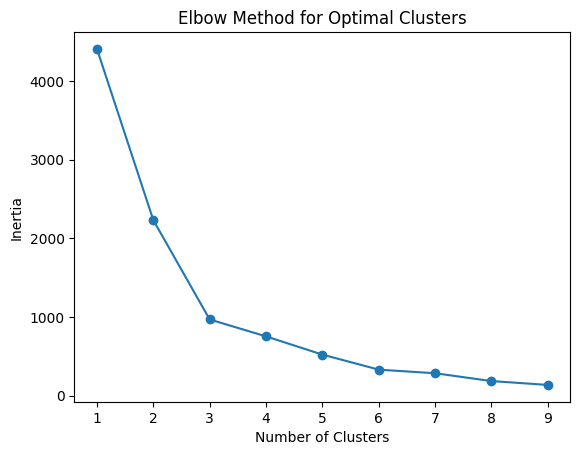

In [ ]:
# prompt: Standardize the data using StandardScaler, identify the optimal number of clusters using the elbow method, and then apply KMeans clustering to assign cluster labels to the dataset.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine optimal number of clusters using elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_features_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Apply KMeans with optimal clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
newdata['Cluster'] = kmeans.fit_predict(clustering_features_scaled)

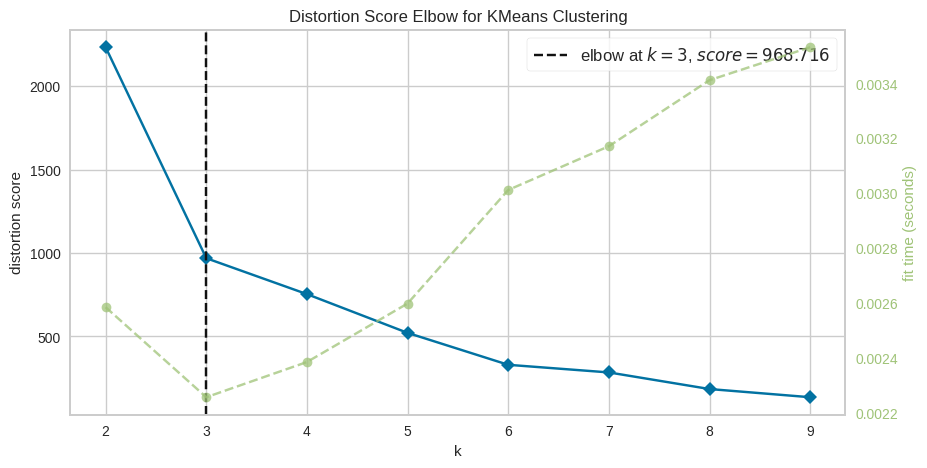

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
!pip install yellowbrick  --q

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer



# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

plt.figure(figsize = (10, 5))
visualizer.fit(clustering_features_scaled) #............................................................. Fit the data to the visualizer
visualizer.show() #............................................................. Finalize and render the figure

In [ ]:
# prompt: Generate a code that specifies the label of the 3 clusters and count of employees in each cluster

# Assuming 'newdata' DataFrame and 'kmeans' model from the previous code are available.

# Get cluster labels and counts
cluster_counts = newdata['Cluster'].value_counts().sort_index()

# Create a dictionary to store cluster labels and employee counts
cluster_info = {}

# Define custom cluster labels (replace with your desired labels)
cluster_labels = {
    0: "High Performance",
    1: "Moderate Performance",
    2: "Low Performance"
}

# Populate the dictionary with cluster labels and counts
for cluster_id, count in cluster_counts.items():
  cluster_info[cluster_labels[cluster_id]] = count


# Print the cluster information
for label, count in cluster_info.items():
    print(f"Cluster Label: {label}, Employee Count: {count}")

Cluster Label: High Performance, Employee Count: 233
Cluster Label: Moderate Performance, Employee Count: 620
Cluster Label: Low Performance, Employee Count: 617


**ATTRITION PREDICTION: USING NEWDATA2 THAT WAS DUPLICATED AT THE TOP**

In [ ]:
newdata2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
# prompt: Please define a function to standardize numerical columns in a DataFrame using StandardScaler, ensuring all numeric features are scaled consistently for better model performance.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

def scale(dataframe):
    numericals = dataframe.select_dtypes(include= 'number')
    for i in numericals.columns:
        if i in dataframe.columns:
            dataframe[[i]] = scaler.fit_transform(dataframe[[i]])
    return dataframe

scale(newdata2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,Yes,Travel_Rarely,0.742527,Sales,-1.010909,-0.891688,Life Sciences,-0.660531,Female,...,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,No,Travel_Frequently,-1.297775,Research & Development,-0.147150,-1.868426,Life Sciences,0.254625,Male,...,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,Yes,Travel_Rarely,1.414363,Research & Development,-0.887515,-0.891688,Other,1.169781,Male,...,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,No,Travel_Frequently,1.461466,Research & Development,-0.764121,1.061787,Life Sciences,1.169781,Female,...,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,No,Travel_Rarely,-0.524295,Research & Development,-0.887515,-1.868426,Medical,-1.575686,Male,...,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,No,Travel_Frequently,0.202082,Research & Development,1.703764,-0.891688,Medical,0.254625,Male,...,-0.426230,0.266233,0.241988,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.679146,-0.314873
1466,0.227347,No,Travel_Rarely,-0.469754,Research & Development,-0.393938,-1.868426,Medical,1.169781,Male,...,-0.426230,-1.584178,0.241988,-0.293077,1.707500,0.338096,-0.001333,0.764998,-0.368715,0.806541
1467,-1.086676,No,Travel_Rarely,-1.605183,Research & Development,-0.640727,0.085049,Life Sciences,-0.660531,Male,...,2.346151,-0.658973,0.241988,-0.678774,-2.171982,0.338096,-0.164613,-0.615492,-0.679146,-0.314873
1468,1.322365,No,Travel_Frequently,0.546677,Sales,-0.887515,0.085049,Medical,1.169781,Male,...,-0.426230,1.191438,-0.932014,0.735447,0.155707,-1.077862,0.325228,0.488900,-0.679146,1.086895


In [ ]:
# prompt: Create a function to encode all categorical columns in a DataFrame using LabelEncoder, converting them into numeric values for machine learning compatibility

# Label Encoding only deals with Categorical Variables

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

def labelEncode(dataframe):
    categoricals = dataframe.select_dtypes(include = ['object', 'category']) # - Select only the categorical columns
    for i in categoricals.columns: # ------------------------------------------- Iterate through the categorical columns
        if i in dataframe.columns: # ------------------------------------------- Identify the categorical columns in the dataframe
            dataframe[i] = lb.fit_transform(dataframe[i])
    return dataframe

labelEncode(newdata2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,1,2,0.742527,2,-1.010909,-0.891688,1,-0.660531,0,...,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,0,1,-1.297775,1,-0.147150,-1.868426,1,0.254625,1,...,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1,2,1.414363,1,-0.887515,-0.891688,4,1.169781,1,...,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,0,1,1.461466,1,-0.764121,1.061787,1,1.169781,0,...,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0,2,-0.524295,1,-0.887515,-1.868426,3,-1.575686,1,...,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0,1,0.202082,1,1.703764,-0.891688,3,0.254625,1,...,-0.426230,0.266233,0.241988,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.679146,-0.314873
1466,0.227347,0,2,-0.469754,1,-0.393938,-1.868426,3,1.169781,1,...,-0.426230,-1.584178,0.241988,-0.293077,1.707500,0.338096,-0.001333,0.764998,-0.368715,0.806541
1467,-1.086676,0,2,-1.605183,1,-0.640727,0.085049,1,-0.660531,1,...,2.346151,-0.658973,0.241988,-0.678774,-2.171982,0.338096,-0.164613,-0.615492,-0.679146,-0.314873
1468,1.322365,0,1,0.546677,2,-0.887515,0.085049,3,1.169781,1,...,-0.426230,1.191438,-0.932014,0.735447,0.155707,-1.077862,0.325228,0.488900,-0.679146,1.086895


In [ ]:
# prompt: Select specific columns as features for predicting employee attrition, and split the data into training (80%) and testing (20%) sets for model evaluation

# Define the features for attrition prediction
features = ['Age', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'WorkLifeBalance', 'RelationshipSatisfaction']

# Separate features (X) and target variable (y)
x = newdata2[features]
y = newdata2.Attrition

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.80)

print(f"xtrain size = {xtrain.shape}")
print(f"xtest size = {xtest.shape}")
print(f"ytrain size ={ytrain.shape}")
print(f"ytest size = {ytrain.shape}")


xtrain size = (1176, 6)
xtest size = (294, 6)
ytrain size =(1176,)
ytest size = (1176,)


In [ ]:
# prompt: Use SMOTE to balance the dataset for predicting employee attrition, train a logistic regression model on the resampled data, and evaluate its performance on the test set using accuracy and classification report metrics

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Select features and target
sel_cols = ['Age', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'WorkLifeBalance', 'RelationshipSatisfaction']
x = newdata2[sel_cols]
y = newdata2.Attrition

# Split into training and test sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.80, random_state=42)

# Balance the training set with SMOTE
smote = SMOTE(random_state=42)
xtrain_balanced, ytrain_balanced = smote.fit_resample(xtrain, ytrain)

# Train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(xtrain_balanced, ytrain_balanced)

# Evaluate on the training set
train_predict = model.predict(xtrain_balanced)
train_accuracy = accuracy_score(train_predict, ytrain_balanced)

# Evaluate on the test set
test_predict = model.predict(xtest)
test_classification_report = classification_report(ytest, test_predict)

# Print results
print(f"Training Accuracy: {train_accuracy}")
print("Test Classification Report:\n", test_classification_report)


Training Accuracy: 0.6267893660531697
Test Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.58      0.71       255
           1       0.20      0.69      0.31        39

    accuracy                           0.60       294
   macro avg       0.56      0.64      0.51       294
weighted avg       0.83      0.60      0.66       294

